In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Date                                                                  
2023-10-18 00:00:00+00:00  28328.341797  28328.341797  28889.009766   
2023-10-19 00:00:00+00:00  28719.806641  28719.806641  28892.474609   
2023-10-20 00:00:00+00:00  29682.949219  29682.949219  30104.085938   
2023-10-21 00:00:00+00:00  29918.412109  29918.412109  30287.482422   
2023-10-22 00:00:00+00:00  29993.896484  29993.896484  30199.433594   

Price                               Low          Open       Volume  
Ticker                          BTC-USD       BTC-USD      BTC-USD  
Date                                                                
2023-10-18 00:00:00+00:00  28174.251953  28413.531250  12724128586  
2023-10-19 00:00:00+00:00  28177.988281  28332.416016  14448058195  
2023-10-20 00:00:00+00:00  28601.669922  28732.812500  21536125230  
2023-10-21 00:00:

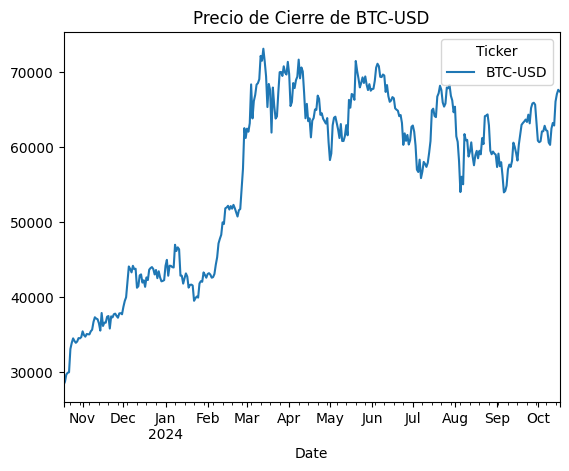

In [8]:
# 1. Especificar el ticker de la acción
ticker = 'BTC-USD'  # Aquí puedes poner el ticker que desees

# 2. Descargar los precios históricos usando yfinance
data = yf.download(ticker, start="2023-10-18", end="2024-10-18")  # Especificamos el rango de fechas

# 3. Visualizar los primeros registros
print(data.head())

# 4. Opcional: Graficar los precios de cierre
import matplotlib.pyplot as plt

data['Adj Close'].plot(title=f"Precio de Cierre de {ticker}")
plt.show()

In [12]:
data_bit = data.iloc[:, :1]
data_bit.head(15)

Price,Adj Close
Ticker,BTC-USD
Date,
2023-10-18 00:00:00+00:00,28328.341797
2023-10-19 00:00:00+00:00,28719.806641
2023-10-20 00:00:00+00:00,29682.949219
2023-10-21 00:00:00+00:00,29918.412109
2023-10-22 00:00:00+00:00,29993.896484
2023-10-23 00:00:00+00:00,33086.234375
2023-10-24 00:00:00+00:00,33901.527344
2023-10-25 00:00:00+00:00,34502.820312


In [17]:
# 3. Calcular los rendimientos logarítmicos diarios
data_bit['Log_Returns'] = np.log(data_bit['Adj Close'] / data_bit['Adj Close'].shift(1))

# 4. Calcular la media y la desviación estándar de los rendimientos logarítmicos
mean_return = data_bit['Log_Returns'].mean()
std_dev = data_bit['Log_Returns'].std()

# 5. Configurar la simulación de Monte Carlo
num_simulaciones = 1000  # Número de trayectorias de simulación
dias_proyeccion = 252  # Días a proyectar (por ejemplo, un año de días hábiles)

# 6. Precio inicial
precio_inicial = data_bit['Adj Close'].iloc[-1]

# 7. Crear una matriz vacía para almacenar los precios simulados
simulaciones_precios = np.zeros((dias_proyeccion, num_simulaciones))

# 8. Llenar la primera fila con el precio inicial
simulaciones_precios[0] = precio_inicial


In [21]:
data_bit

Price,Adj Close,Log_Returns
Ticker,BTC-USD,
Date,,
2023-10-18 00:00:00+00:00,28328.341797,NaN
2023-10-19 00:00:00+00:00,28719.806641,0.013724
2023-10-20 00:00:00+00:00,29682.949219,0.032986
2023-10-21 00:00:00+00:00,29918.412109,0.007901
2023-10-22 00:00:00+00:00,29993.896484,0.002520
...,...,...
2024-10-13 00:00:00+00:00,62851.375000,-0.005421
2024-10-14 00:00:00+00:00,66046.125000,0.049581


In [28]:
tamano_muestra= 200
#sacar muestras
muestra = np.random.choice(data_bit['Log_Returns'], tamano_muestra)
muestra

array([-0.00030009,  0.04104685, -0.00383726,  0.0031893 ,  0.0354997 ,
        0.06175721, -0.00202853,  0.00650453,  0.00107858, -0.00591121,
        0.01288091,  0.00935992, -0.00939129, -0.00168357,  0.00202634,
        0.01097396,  0.01097396,  0.00935992, -0.02537448, -0.01035855,
       -0.02828177,  0.04607657,  0.0358412 , -0.00811202,  0.00136488,
        0.00674619, -0.02830892, -0.00025171, -0.06221701,  0.00737463,
       -0.02024486, -0.00844025, -0.02284251,  0.05251119,  0.00215601,
       -0.00994516, -0.00358116, -0.00778374, -0.03173873,  0.02997731,
       -0.02094342, -0.02885744, -0.04315788, -0.00030009,  0.00499168,
        0.00318826,  0.00727222,  0.02130028, -0.00336253, -0.00093652,
        0.02009547, -0.01035855, -0.015954  , -0.02094342, -0.00761052,
       -0.00432859, -0.05152205, -0.02649845,  0.00208609, -0.0326063 ,
        0.0207393 ,  0.01786587,  0.03713847,  0.00812374, -0.00557424,
        0.00727222,  0.00499168,  0.01135985,  0.07856708,  0.01

In [29]:
muestras_generadas = np.array([])
num_muestras = 1000

for i in range (num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace=True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas


array([[-0.00838777, -0.01354163, -0.00994516, ...,  0.01786587,
        -0.02167404, -0.00277399],
       [-0.02828177, -0.00093652, -0.01305211, ...,  0.0079013 ,
         0.04104685,  0.03193999],
       [ 0.02009547,  0.04593622, -0.00025171, ...,  0.000362  ,
         0.00241533, -0.015954  ],
       ...,
       [ 0.01157701,  0.00176171,         nan, ..., -0.01354163,
        -0.00383726, -0.02830892],
       [-0.0014548 , -0.04017886,  0.02195288, ...,  0.00241533,
         0.02199433,  0.03388148],
       [-0.05152205,  0.02997731, -0.015954  , ...,  0.01135985,
         0.01230814,  0.02502098]])

In [18]:

# 9. Realizar la simulación de Monte Carlo
for t in range(1, dias_proyeccion):
    # Generar rendimientos aleatorios de acuerdo con la distribución normal
    random_returns = np.random.normal(mean_return, std_dev, num_simulaciones)
    # Calcular el precio en cada paso usando la fórmula de caminata aleatoria geométrica
    simulaciones_precios[t] = simulaciones_precios[t-1] * np.exp(random_returns)


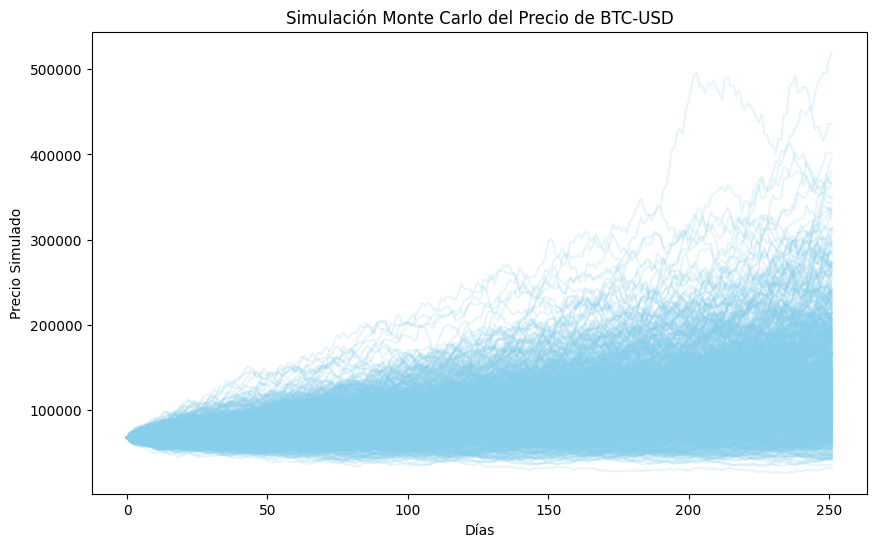

In [19]:

# 10. Graficar las trayectorias simuladas
plt.figure(figsize=(10, 6))
plt.plot(simulaciones_precios, color='skyblue', alpha=0.2)
plt.title(f"Simulación Monte Carlo del Precio de {ticker}")
plt.xlabel("Días")
plt.ylabel("Precio Simulado")
plt.show()